In [1242]:
import json as js
import pandas as pd
import numpy as np
import missingno as msno
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas_profiling as pp
%matplotlib inline
pd.options.mode.chained_assignment = None

# WeRateDogs Twitter Wrangling Project

Jump to contents:

[Step 1: Gather Data](#cell2)

[Step 2: Assessing Data](#cell3)

[Step 3: Identify Quality Issues](#cell4)

[Step 4: Clean and Tidy Data](#cell5)

[Step 5: Analyze Data with Visuals](#cell6)



# 1. Gather Data
<a id="cell2"></a>

In [1243]:
#loading twitter archive
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [1244]:
#loading image prediction
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
respon = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(respon.content)

predictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [1245]:
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Using code provided in twitter_api.py due to mobile verification issues
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

## Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
## These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

## NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
 df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
 change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
 ## NOTE TO REVIEWER: this student had mobile verification issues so the following
 Twitter API code was sent to this student from a Udacity instructor
 Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

## Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
## Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [1246]:
#Each tweet's JSON data should be written to its own line, creating list from tweet_json.txt file
tweet_json = []
with open('tweet-json.txt') as file:
    for lines in file:
        line = js.loads(lines)
        tweet_json.append({'tweet_id':line['id'],
                           'retweet_count':line['retweet_count'],
                           'favorite_count':line['favorite_count']})

In [1247]:
#printing line of loaded data
tweet_json[1]

{'tweet_id': 892177421306343426,
 'retweet_count': 6514,
 'favorite_count': 33819}

In [1248]:
#convert tweet_json list to dataframe
tweet_json = pd.DataFrame(tweet_json, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# Step 2: Assessing Data
<a id="cell3"></a>

## Investigating the Predictions dataframe

In [1249]:
#printing the twitter_archive dataframe
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [1250]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [1251]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [1252]:
name_list = twitter_archive['name'].unique().tolist()


In [1253]:
name_list.sort()
print(name_list)

['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al', 'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander', 'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber', 'Ambrose', 'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel', 'Anna', 'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen', 'Arlo', 'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh', 'Aspen', 'Astrid', 'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn', 'Ava', 'Axel', 'Bailey', 'Baloo', 'Balto', 'Banditt', 'Banjo', 'Barclay', 'Barney', 'Baron', 'Barry', 'Batdog', 'Bauer', 'Baxter', 'Bayley', 'BeBe', 'Bear', 'Beau', 'Beckham', 'Beebop', 'Beemo', 'Bell', 'Bella', 'Belle', 'Ben', 'Benedict', 'Benji', 'Benny', 'Bentley', 'Berb', 'Berkeley', 'Bernie', 'Bert', 'Bertson', 'Betty', 'Beya', 'Biden', 'Bilbo', 'Billl', 'Billy', 'Binky', 'Birf', 'Bisquick', 'Blakely', 'Blanket', 'Blipson', 'Blitz', 'Bloo', 'Bloop', 'Blu', 'Blue', 'Bluebert', 'Bo', 'Bob', 'Bobb', 'Bobbay', 'Bobble', 'Bobby', 'Bode', 'Bodie', 'Bonapart

<AxesSubplot:>

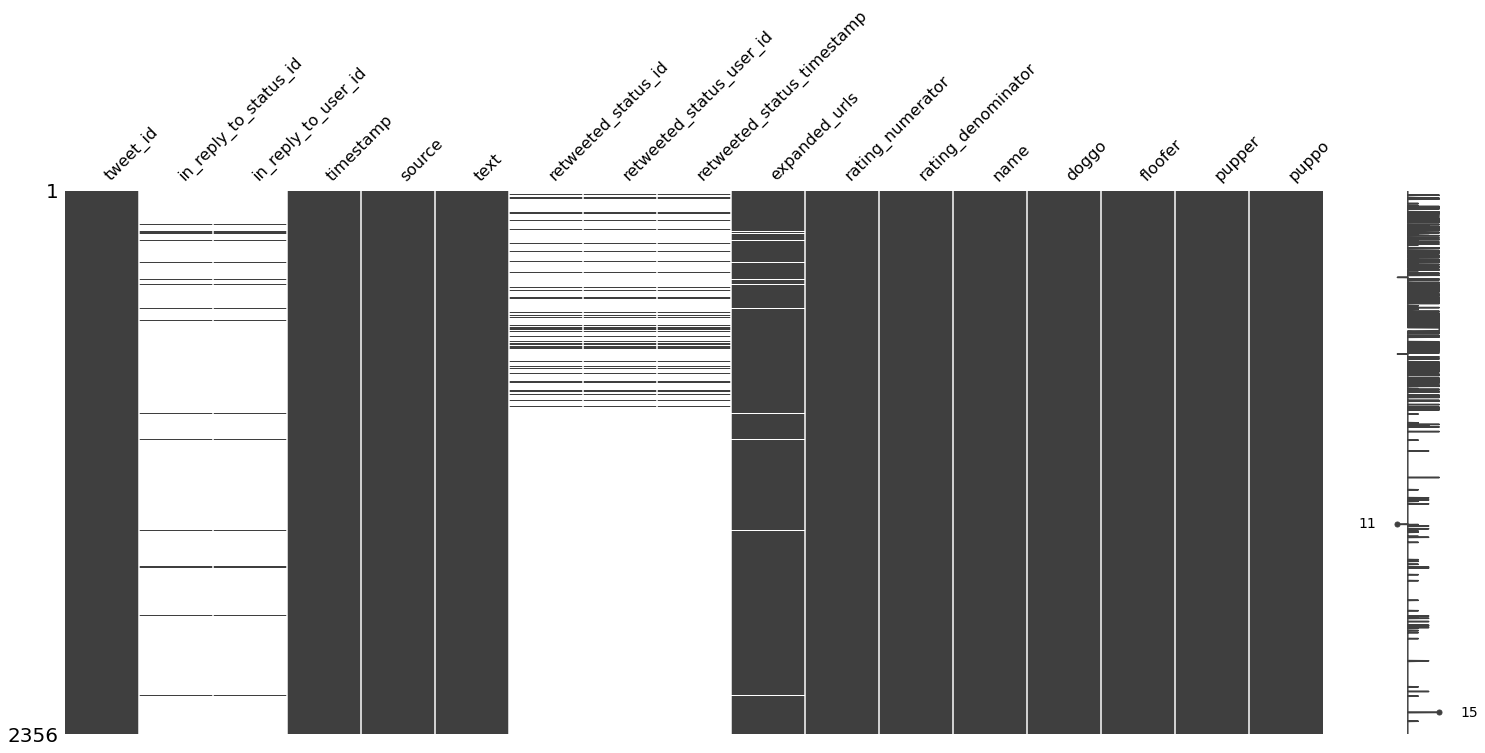

In [1254]:
msno.matrix(twitter_archive)

## Investigating the Predictions dataframe

In [1255]:
predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [1256]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


<AxesSubplot:>

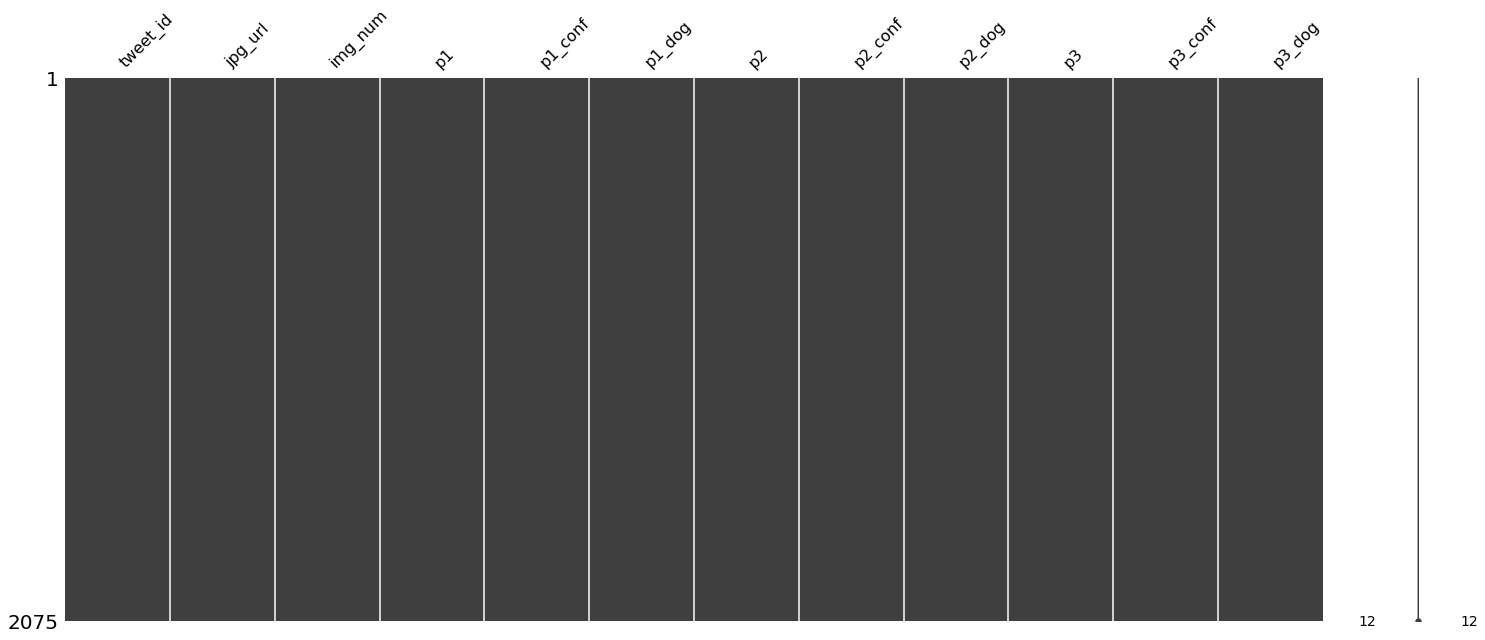

In [1257]:
msno.matrix(predictions)

In [1258]:
#investigating false prediction entries
false_dogs = predictions[(predictions.p1_dog == False) & (predictions.p2_dog == False) & (predictions.p3_dog == False)]

In [1259]:
false_dogs.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,0.271485,False,gar,0.189945,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,0.000055,False,acorn,0.000026,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,0.114071,False,common_iguana,0.043255,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,0.190142,False,wig,0.034510,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,0.012601,False,coyote,0.000057,False


In [1260]:
#investigating one entry for accuracy
predictions.query('tweet_id == 666983947667116034')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,0.190142,False,wig,0.03451,False


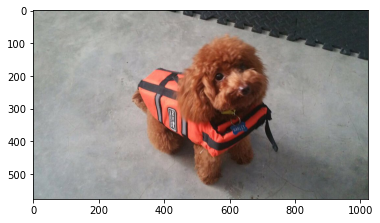

In [1261]:
img=mpimg.imread('dog_in_life_vest.jpg')
imgplot = plt.imshow(img)

## Investigating the tweet_json dataframe

In [1262]:
tweet_json

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [1263]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [1264]:
tweet_json.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


<AxesSubplot:>

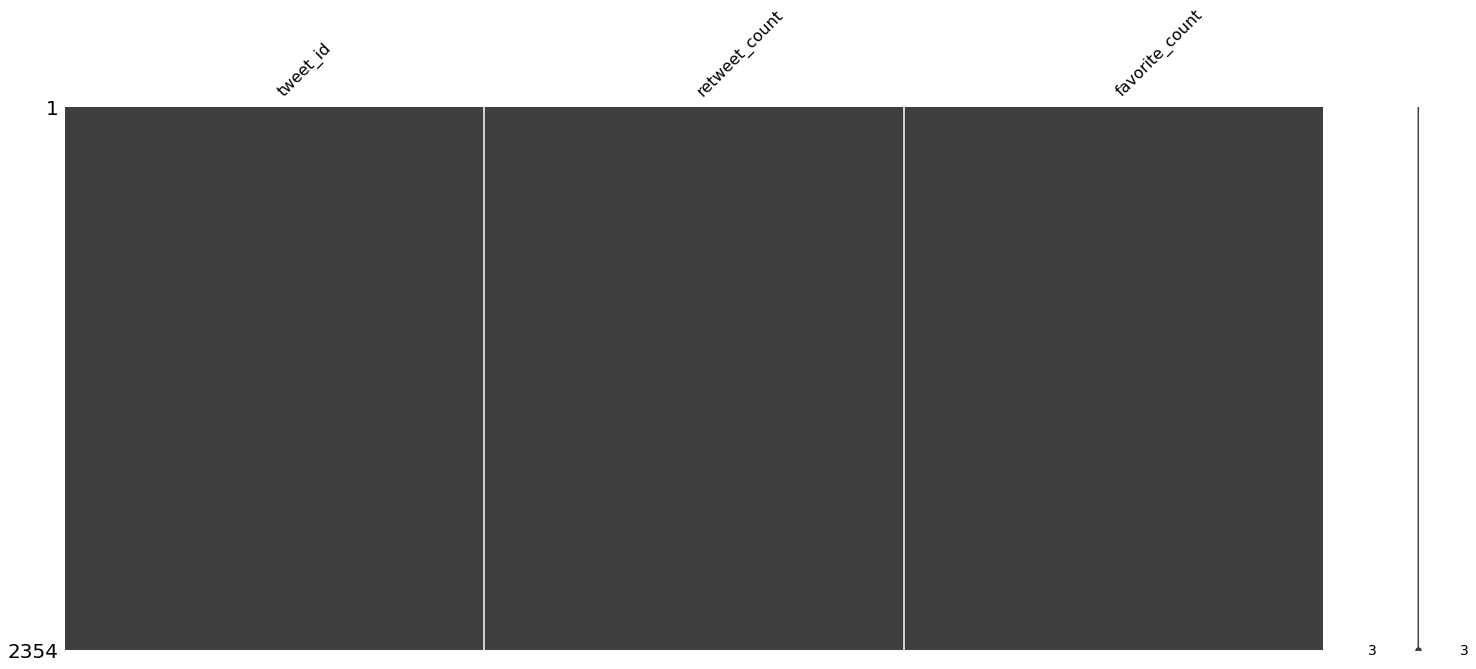

In [1265]:
#showing a plot of data completeness. Though we can see from above that there are entries with 0 that will need to be cleaned later
msno.matrix(tweet_json)

# Step 3: Identify Quality Issues
<a id="cell4"></a>

- The timestamp column in twitter_archive is a data type of object and not a datetime or timestamp datatype.
- There are 59 missing entries in the expanded_url column.
- There are entries that are retweets and need to be removed
- The source column entry is too long and needs to be shortened
- The name column contains entries that are not names, like "a" and "by", all lower case names entries appear to be non-names
- The prediction dataframe contains entries that are not dogs
- The prediction dataframe columns need descriptive column names
- Some of the predictions that are "false" for a dog are indeed pictures of dogs
- The img_num column is not needed and can be removed
- The tweet_json data has entries with 0's in the retweet_count and favorite_count, that may be missing data which needs to be removed
- The three datasets do not have the same amount of entries, this will need to be cleaned so analysis and visualizations can be created

## Tidiness

 - The "doggo", "floofer", "pupper" and "puppo" columns in the twitter_archive dataframe need to be melded into one categorical column
 - All three dataframes need to be melded into one by using the "tweet_id" 

# Step 4: Clean and Tidy Data
<a id="cell5"></a>

In [1266]:
#Copy dataframe
twitter_archive_copy = twitter_archive.copy()

### Define: Casting the "timestamp" column to a datetime datatype. 

#### Code:

In [1267]:
#Cast timestamp to datetime
twitter_archive_copy['timestamp'] = pd.to_datetime(twitter_archive['timestamp'])

### Test

In [1268]:
# timestamp shows datetime dtype
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Define: Drop empty values from "expanded_url" column in twitter_archive

#### Code:

In [1269]:
#drop na records from expanded_urls
twitter_archive_copy = twitter_archive.dropna(axis=0, how='any', subset=['expanded_urls'])

### Test

<AxesSubplot:>

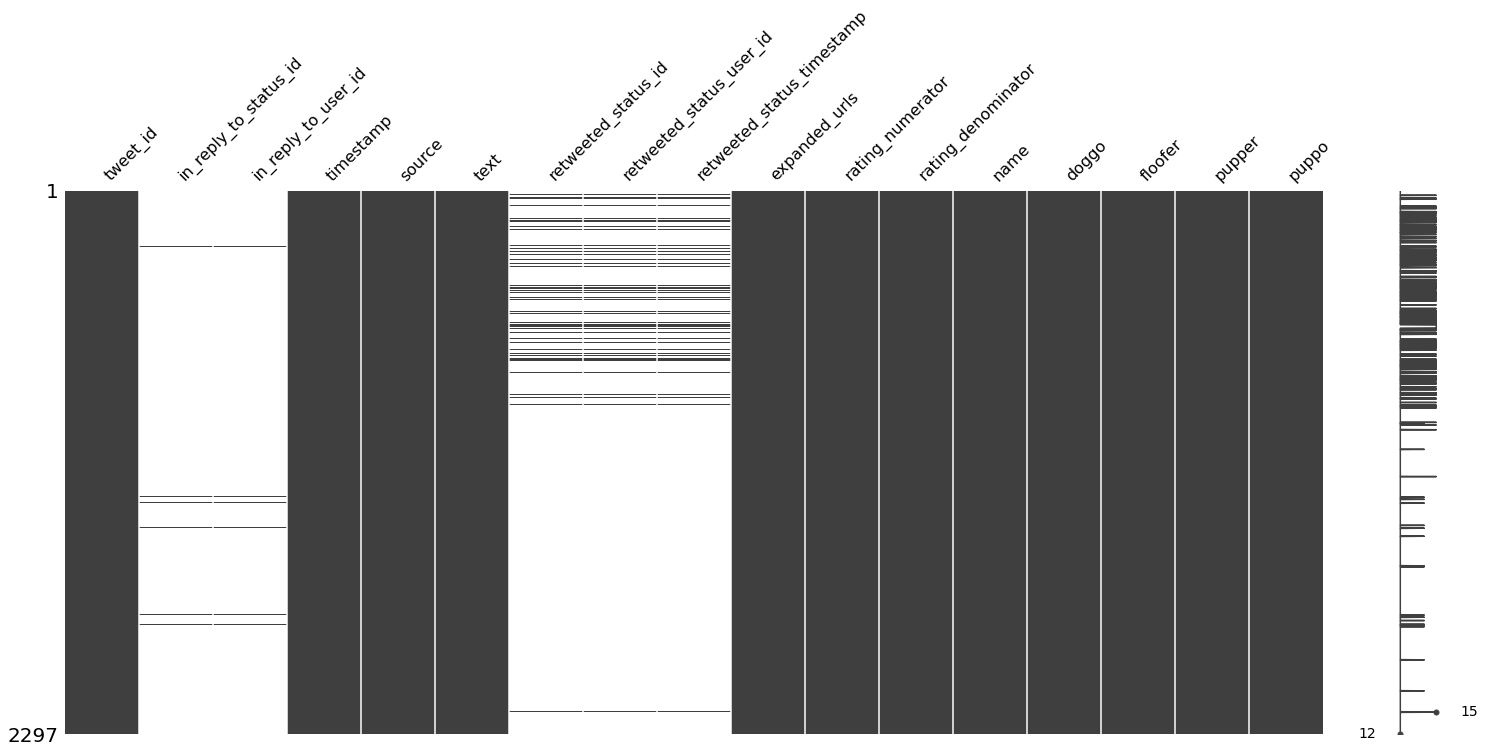

In [1270]:
#expanded_urls column now show no empty records
msno.matrix(twitter_archive_copy)

We can see that the empty values in the "expanded_urls" column have been dropped. Next we will work on removing the retweeted entries as we do not want these included.

### Define: Remove the retweeted entries

#### Code:

In [1271]:
#removing the retweeted and unneeded columns
twitter_archive_copy.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace=True)

### Test

<AxesSubplot:>

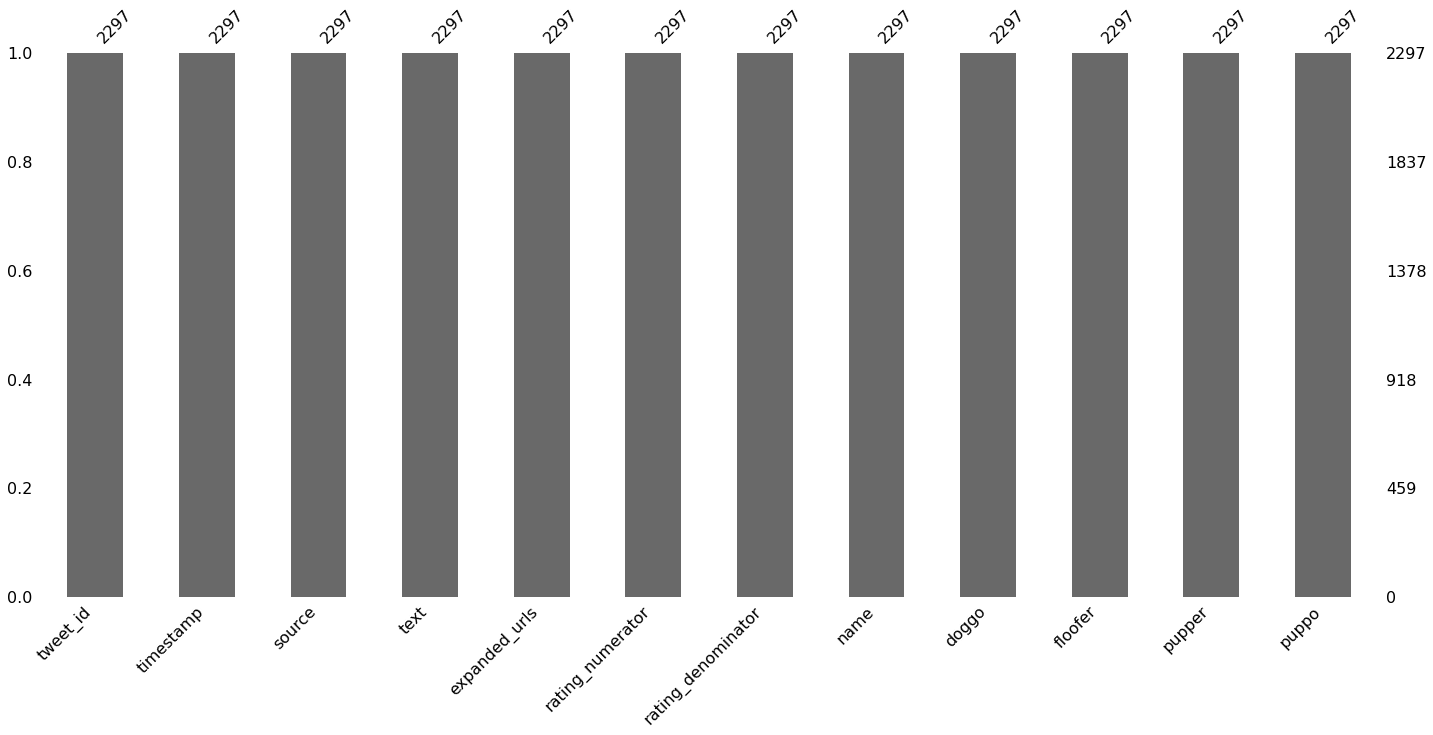

In [1272]:
#the unneeded columns have been dropped
msno.bar(twitter_archive_copy)

In [1273]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2297 non-null   int64 
 1   timestamp           2297 non-null   object
 2   source              2297 non-null   object
 3   text                2297 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2297 non-null   int64 
 6   rating_denominator  2297 non-null   int64 
 7   name                2297 non-null   object
 8   doggo               2297 non-null   object
 9   floofer             2297 non-null   object
 10  pupper              2297 non-null   object
 11  puppo               2297 non-null   object
dtypes: int64(3), object(9)
memory usage: 233.3+ KB


### Define: Combine the "doggo", "floofer", "pupper" and "puppo" columns.

#### Code:

In [1274]:
#combining columns into "age" column
twitter_archive_copy['age'] = twitter_archive[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)

In [1275]:
#removing the extra columns
twitter_archive_copy = twitter_archive_copy[['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'age']]

### Test

In [1276]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2297 non-null   int64 
 1   timestamp           2297 non-null   object
 2   source              2297 non-null   object
 3   text                2297 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2297 non-null   int64 
 6   rating_denominator  2297 non-null   int64 
 7   name                2297 non-null   object
 8   age                 2297 non-null   object
dtypes: int64(3), object(6)
memory usage: 179.5+ KB


### Define: Update "source" column values to shorter values. Values are a full url that can be shortened for better visibility

#### Code:

In [1277]:
#get list of unique values from source column
twitter_archive_copy['source'].unique().tolist()

['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
 '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>']

In [1278]:
#replace values
twitter_archive_copy['source'] = twitter_archive['source'].replace(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
 '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], ["Twitter for iPhone", "Twitter Web Client", "Vine", "TweetDeck"])

### Test

In [1279]:
#check that values updated
twitter_archive_copy['source'].unique().tolist()

['Twitter for iPhone', 'Twitter Web Client', 'Vine', 'TweetDeck']

### Define: Replace lower case name values

#### Code:

In [1280]:
#replacing lowercase names with NaN
twitter_archive_copy.name=twitter_archive_copy.name.mask(twitter_archive.name.str.islower().fillna(False))

In [1281]:
#filling NaN values with None
twitter_archive_copy["name"].fillna("None", inplace = True) 

In [1282]:
#creating name list to test cleaning
new_name_list = twitter_archive_copy['name'].unique().tolist()

### Test

In [1283]:
#printing the name list to check if the lower case names have been removed and the None value updated in their place
new_name_list.sort()
print(new_name_list)

['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al', 'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander', 'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber', 'Ambrose', 'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel', 'Anna', 'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen', 'Arlo', 'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh', 'Aspen', 'Astrid', 'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn', 'Ava', 'Axel', 'Bailey', 'Baloo', 'Balto', 'Banditt', 'Banjo', 'Barclay', 'Barney', 'Baron', 'Barry', 'Batdog', 'Bauer', 'Baxter', 'Bayley', 'BeBe', 'Bear', 'Beau', 'Beckham', 'Beebop', 'Beemo', 'Bell', 'Bella', 'Belle', 'Ben', 'Benedict', 'Benji', 'Benny', 'Bentley', 'Berb', 'Berkeley', 'Bernie', 'Bert', 'Bertson', 'Betty', 'Beya', 'Biden', 'Bilbo', 'Billl', 'Billy', 'Binky', 'Birf', 'Bisquick', 'Blakely', 'Blanket', 'Blipson', 'Blitz', 'Bloo', 'Bloop', 'Blu', 'Blue', 'Bluebert', 'Bo', 'Bob', 'Bobb', 'Bobbay', 'Bobble', 'Bobby', 'Bode', 'Bodie', 'Bonapart

In [1284]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2297 non-null   int64 
 1   timestamp           2297 non-null   object
 2   source              2297 non-null   object
 3   text                2297 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2297 non-null   int64 
 6   rating_denominator  2297 non-null   int64 
 7   name                2297 non-null   object
 8   age                 2297 non-null   object
dtypes: int64(3), object(6)
memory usage: 244.0+ KB


## Cleaning the prediction dataframe

There are entries that are falsly predicted as dogs, as well as predictions that are incorrectly predicted as not dogs. There are 324 entries that are false in all 3 predictions, due to the large number it would be inefficient to individually check these entries. These entries will remain in the dataframe.

We will move on to renaming the columns for easier interpretation.

In [1286]:
#copy dataframe
predictions_copy = predictions.copy()

### Define: Rename the prediction columns for better visibility

#### Code:

In [1287]:
#renaming the columns for easier interpretation
predictions_copy = predictions_copy.rename(columns={'p1':'prediction1', 'p1_conf':'prediction1_confidence', 'p1_dog':'prediction1_is_dog',
                                                      'p2':'prediction2', 'p2_conf':'prediction2_confidence', 'p2_dog':'prediction2_is_dog',
                                                      'p3':'prediction3', 'p3_conf':'prediction3_confidence', 'p3_dog':'prediction3_is_dog'})

### Test

In [1288]:
#renaming of columns is reflected in the dataframe
predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tweet_id                2075 non-null   int64  
 1   jpg_url                 2075 non-null   object 
 2   img_num                 2075 non-null   int64  
 3   prediction1             2075 non-null   object 
 4   prediction1_confidence  2075 non-null   float64
 5   prediction1_is_dog      2075 non-null   bool   
 6   prediction2             2075 non-null   object 
 7   prediction2_confidence  2075 non-null   float64
 8   prediction2_is_dog      2075 non-null   bool   
 9   prediction3             2075 non-null   object 
 10  prediction3_confidence  2075 non-null   float64
 11  prediction3_is_dog      2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Define: Drop the img_num column, it is not needed and removing it will create a cleaner dataframe

#### Code:

In [1289]:
predictions_copy = predictions_copy.drop(columns = 'img_num')

### Test

In [1290]:
predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tweet_id                2075 non-null   int64  
 1   jpg_url                 2075 non-null   object 
 2   prediction1             2075 non-null   object 
 3   prediction1_confidence  2075 non-null   float64
 4   prediction1_is_dog      2075 non-null   bool   
 5   prediction2             2075 non-null   object 
 6   prediction2_confidence  2075 non-null   float64
 7   prediction2_is_dog      2075 non-null   bool   
 8   prediction3             2075 non-null   object 
 9   prediction3_confidence  2075 non-null   float64
 10  prediction3_is_dog      2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 135.9+ KB


## Cleaning the json dataframe

In [1292]:
#copy the dataframe
tweet_json_copy = tweet_json.copy()

### Define: Remove records with zeros, which indicates missing data

#### Code:

In [1293]:
# entries with 0 need to be identified
zero_entries = tweet_json_copy[(tweet_json_copy.retweet_count == 0.000000) | (tweet_json_copy.favorite_count == 0.000000) ]
zero_entries

,tweet_id,retweet_count,favorite_count
31,886054160059072513,108,0
35,885311592912609280,19297,0
67,879130579576475649,7181,0
72,878404777348136964,1349,0
73,878316110768087041,6965,0
...,...,...,...
1021,746521445350707200,1110,0
1041,743835915802583040,2387,0
1240,711998809858043904,138,0
2257,667550904950915073,37,0


In [1294]:
#replace zeros with NaN
tweet_json_copy['retweet_count']=tweet_json_copy['retweet_count'].replace(0, np.nan)
tweet_json_copy['favorite_count']=tweet_json_copy['favorite_count'].replace(0, np.nan)

In [1295]:
#checking number of Nan values
tweet_json_copy.isna().sum()

tweet_id            0
retweet_count       1
favorite_count    179
dtype: int64

In [1296]:
#drop NaN values
tweet_json_copy = tweet_json_copy.dropna()

### Test

In [1297]:
# the min now does not include zeros and reflects the correct data
tweet_json_copy.describe()

,tweet_id,retweet_count,favorite_count
count,2.174000e+03,2174.000000,2174.000000
mean,7.370740e+17,2759.255750,8749.977001
std,6.746744e+16,4647.291935,12053.865672
min,6.660209e+17,2.000000,52.000000
25%,6.768326e+17,608.000000,1916.250000
50%,7.097095e+17,1342.000000,4053.500000
75%,7.893029e+17,3220.000000,11110.000000
max,8.924206e+17,79515.000000,132810.000000


In [1298]:
#check that NaN values have been removed
tweet_json_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        2174 non-null   int64  
 1   retweet_count   2174 non-null   float64
 2   favorite_count  2174 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 67.9 KB


## Tidiness - Combine Dataframes

### Define: merge all three dataframes into one, using the tweet_id

#### Code:

In [1300]:
#merging the first two dataframes into one
merge1 = pd.merge(twitter_archive_copy,predictions_copy, on =["tweet_id"], how ='left')

In [1301]:
#creating the master by merging in the last dataframe
tweet_data_master = pd.merge(merge1, tweet_json_copy, on=['tweet_id'], how='left')

### Test

In [1302]:
#Our master dataframe now shows all the columns from the merged dataframes
tweet_data_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,age,jpg_url,...,prediction1_confidence,prediction1_is_dog,prediction2,prediction2_confidence,prediction2_is_dog,prediction3,prediction3_confidence,prediction3_is_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853.0,39467.0
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514.0,33819.0
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328.0,25461.0
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964.0,42908.0
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774.0,41048.0


### Define: Remove NaN entries for cohesiveness

#### Code:

In [1303]:
#dropping NaN values for plots
tweet_data_master = tweet_data_master.dropna(axis=0, how='any', subset=['retweet_count'])
tweet_data_master = tweet_data_master.dropna(axis=0, how='any', subset=['prediction1'])

### Test

In [1304]:
#the master dataframe now shows matching values for all columns
tweet_data_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2296
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tweet_id                1994 non-null   int64  
 1   timestamp               1994 non-null   object 
 2   source                  1994 non-null   object 
 3   text                    1994 non-null   object 
 4   expanded_urls           1994 non-null   object 
 5   rating_numerator        1994 non-null   int64  
 6   rating_denominator      1994 non-null   int64  
 7   name                    1994 non-null   object 
 8   age                     1994 non-null   object 
 9   jpg_url                 1994 non-null   object 
 10  prediction1             1994 non-null   object 
 11  prediction1_confidence  1994 non-null   float64
 12  prediction1_is_dog      1994 non-null   object 
 13  prediction2             1994 non-null   object 
 14  prediction2_confidence  1994 non-null   

# Step 5: Analyze Data with Visuals
<a id="cell6"></a>

In [1306]:
#showing values for combined dataframe
tweet_data_master.describe()

,tweet_id,rating_numerator,rating_denominator,prediction1_confidence,prediction2_confidence,prediction3_confidence,retweet_count,favorite_count
count,1.994000e+03,1994.000000,1994.000000,1994.000000,1.994000e+03,1.994000e+03,1994.000000,1994.000000
mean,7.358508e+17,12.280843,10.532096,0.593941,1.344195e-01,6.024848e-02,2766.753260,8895.725677
std,6.747816e+16,41.497718,7.320710,0.271954,1.006807e-01,5.089067e-02,4674.698447,12213.193181
min,6.660209e+17,0.000000,2.000000,0.044333,1.011300e-08,1.740170e-10,16.000000,81.000000
25%,6.758475e+17,10.000000,10.000000,0.362857,5.393987e-02,1.619283e-02,624.750000,1982.000000
50%,7.084748e+17,11.000000,10.000000,0.587635,1.174550e-01,4.950530e-02,1359.500000,4136.000000
75%,7.877873e+17,12.000000,10.000000,0.846285,1.951377e-01,9.159438e-02,3220.000000,11308.000000
max,8.924206e+17,1776.000000,170.000000,1.000000,4.880140e-01,2.734190e-01,79515.000000,132810.000000


In [1307]:
tweet_data_master['retweet_count'].max()

79515.0

In [1308]:
rating_breed = tweet_data_master.groupby('prediction1', as_index=True)['rating_numerator'].sum()
rating_breed_top = rating_breed.nlargest(10)
print(rating_breed_top)

prediction1
golden_retriever      1836
bow_tie               1806
Labrador_retriever    1321
Pembroke              1007
Chihuahua              846
pug                    553
Pomeranian             489
chow                   476
Samoyed                468
toy_poodle             422
Name: rating_numerator, dtype: int64


## Plot top retweets by breed prediction

In [1309]:
#organizing data to create plot
max_retweet1 = tweet_data_master.groupby('prediction1', as_index=True)['retweet_count'].sum()
max_retweet2 = tweet_data_master.groupby('prediction2', as_index=True)['retweet_count'].sum()
max_retweet3 = tweet_data_master.groupby('prediction3', as_index=True)['retweet_count'].sum()
breed_count1  = max_retweet1.nlargest(10)
breed_count2  = max_retweet2.nlargest(10)
breed_count3  = max_retweet3.nlargest(10)

In [1310]:
breed_count1 = breed_count1.to_frame()
breed_count2 = breed_count2.to_frame()
breed_count3 = breed_count3.to_frame()

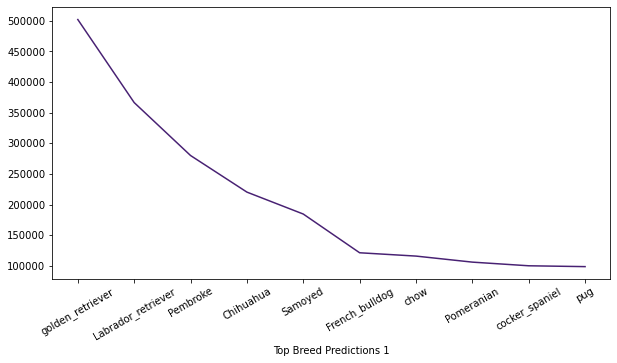

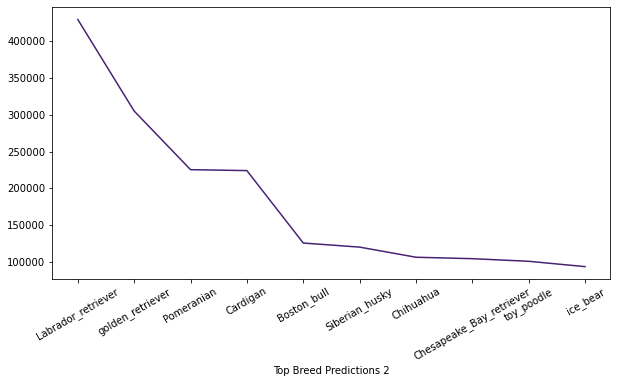

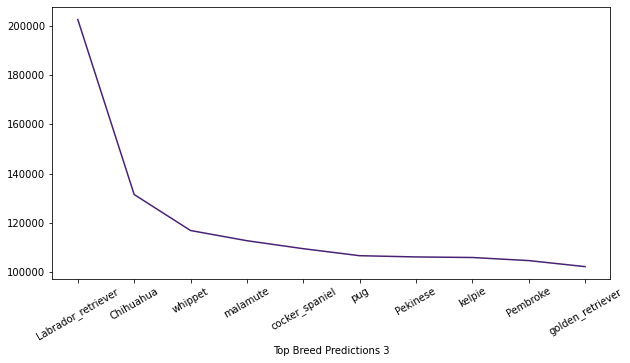

In [1311]:
plt.figure(figsize=(10, 5))
plt.plot(breed_count1)
plt.xticks(rotation='30')
plt.xlabel('Top Breed Predictions 1')

plt.figure(figsize=(10, 5))
plt.plot(breed_count2)
plt.xticks(rotation='30')
plt.xlabel('Top Breed Predictions 2')

plt.figure(figsize=(10, 5))
plt.plot(breed_count3)
plt.xticks(rotation='30')
plt.xlabel('Top Breed Predictions 3')
plt.show()

## Plot Tweet Sources

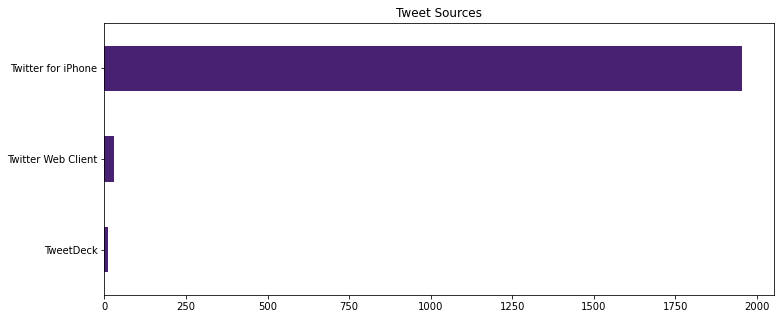

In [1312]:
tweet_data_master.source.value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(12,5), title='Tweet Sources');

In [1313]:
#export data to CSV
tweet_data_master.to_csv('twitter_archive_master.csv')